In [78]:
import numpy as np
import pandas as pd
import seaborn as sns


# Question 1

In [79]:
airpol_df = pd.read_csv('airpol.csv')
print(airpol_df)

    Wind  Solar Rad  CO  NO  NO2  O3  HC
0      8         98   7   2   12   8   2
1      7        107   4   3    9   5   3
2      7        103   4   3    5   6   3
3     10         88   5   2    8  15   4
4      6         91   4   2    8  10   3
5      8         90   5   2   12  12   4
6      9         84   7   4   12  15   5
7      5         72   6   4   21  14   4
8      7         82   5   1   11  11   3
9      8         64   5   2   13   9   4
10     6         71   5   4   10   3   3
11     6         91   4   2   12   7   3
12     7         72   7   4   18  10   3
13    10         70   4   2   11   7   3
14    10         72   4   1    8  10   3
15     9         77   4   1    9  10   3
16     8         76   4   1    7   7   3
17     8         71   5   3   16   4   4
18     9         67   4   2   13   2   3
19     9         69   3   3    9   5   3
20    10         62   5   3   14   4   4
21     9         88   4   2    7   6   3
22     8         80   4   2   13  11   4
23     5        

(Used AI to generate the markdown formula below)

### Covariance and variance formula 

# Sample Covariance and Variance Formulas

**Sample Covariance between X and Y:**

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

**Sample Variance of X:**

$$
\text{Var}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$

In [80]:
# extract the two variables
wind = airpol_df['Wind']
solar_rad = airpol_df['Solar Rad']

# calculate the means
mean_wind = wind.mean()
mean_solar = solar_rad.mean()

# compute the covariance numerator by summing over the product of deviations
numerator = ((wind - mean_wind) * (solar_rad - mean_solar)).sum()

# for sample covariance, divide by (n - 1)
n = len(wind)
covariance = numerator / (n - 1)

print("Covariance:", covariance)

# Compute sample variances using first principles
var_wind = ((wind - mean_wind) ** 2).sum() / (n - 1)
var_solar = ((solar_rad - mean_solar) ** 2).sum() / (n - 1)

print("variance for wind:", var_wind)
print("variance for solar rad:", var_solar)

cov_var_matrix = np.array([[var_wind, covariance],
               [covariance, var_solar]])
print("Covariance-Variance Matrix:")
print(cov_var_matrix)

# now get the correlation between the 2 variables using first principles
std_wind = np.sqrt(var_wind) # standard deviation of wind
std_solar = np.sqrt(var_solar) # standard deviation of solar rad         
correlation = covariance / (std_wind * std_solar)
print("Correlation:", correlation)


#compute the correlation matrix 
correlation_matrix = np.array([[1, correlation],
                               [correlation, 1]])

print("Correlation Matrix:")
print(correlation_matrix)


Covariance: -2.7804878048780486
variance for wind: 2.5
variance for solar rad: 300.51567944250877
Covariance-Variance Matrix:
[[  2.5         -2.7804878 ]
 [ -2.7804878  300.51567944]]
Correlation: -0.10144191102756318
Correlation Matrix:
[[ 1.         -0.10144191]
 [-0.10144191  1.        ]]


In [81]:
#pip install matplotlib

## I am lead to believe that in this question we are more interested in the relationship between the variables and we are expressing this relationship in terms of vectors, hence we will employ the use of the correlation.

We start by centering the variables:

$$
x = \text{wind} - \text{mean\_wind} \quad \text{and} \quad y = \text{solar\_rad} - \text{mean\_solar}
$$

The dot product of the centered variables gives the covariance (up to the normalization factor):

$$
\text{covariance} = \frac{x^T y}{n-1}
$$

Thus, the correlation can be written as:

$$
\text{correlation} = \frac{x^T y}{(n-1)\,\text{std\_wind}\,\text{std\_solar}}
$$

Alternatively, if we form the matrix \( A \) with the centered variables as columns,

$$
A = \begin{bmatrix} x & y \end{bmatrix},
$$

then the covariance matrix is

$$
\text{Cov} = \frac{A^T A}{n-1},
$$

and the off-diagonal element of $\text{Cov}$ is exactly $\frac{x^T y}{n-1}$. Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_wind}\,\text{std\_solar}}.
$$

## Using Correlation to Find the Angle Between Vectors

In our analysis, remember that the correlation between the centered variables (wind and solar radiation) is defined as the cosine of the angle between their corresponding vectors:

$$
\cos(\theta) = \text{correlation}
$$

This means if we know the correlation value, we can recover the angle between the two vectors by computing the arccosine. For example, in Python using NumPy, you can compute the angle (in radians) as:

$$
\theta = \arccos(\text{correlation})
$$

To convert this angle to degrees, use:

$$
\theta_{degrees} = \theta \times \frac{180}{\pi}
$$

Thus, the correlation not only tells us about the strength of the linear relationship but also directly informs us of the geometric angle between the centered variable vectors.

(explanation from AI on why we use the notation of Cov(0,1))


The notation **[0,1]** in the covariance matrix is used to refer to the position of the element representing the covariance between the two variables. In a 2x2 covariance matrix, the indices are zero-based, meaning:

- **0** represents the first variable (e.g., wind).
- **1** represents the second variable (e.g., solar radiation).

Thus, **Cov[0,1]** is the element in the first row and second column of the matrix, which holds the covariance between these two variables. This convention is common in programming and mathematical notation when dealing with arrays or matrices.

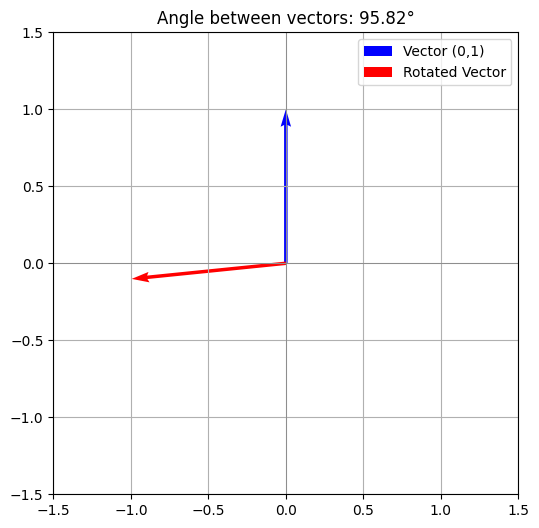

Correlation: -0.10144191102756318
Angle (radians): 1.6724130291225974
Angle (degrees): 95.82220817141446


In [82]:
# Plotting an arbitrary vector and its rotated counterpart using correlation-derived angle
import numpy as np
import matplotlib.pyplot as plt

# Use existing correlation if defined; otherwise, use an arbitrary value
try:
    corr = correlation
except NameError:
    corr = 0.5  # default arbitrary correlation value

# Calculate angle (in radians) from the correlation (assuming correlation = cos(theta))
theta = np.arccos(corr)
theta_deg = np.degrees(theta)

# Define the arbitrary vector (0,1)
vec1 = np.array([0, 1])

# Compute the rotated vector by applying a rotation matrix to vec1
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta),  np.cos(theta)]])
vec2 = rotation_matrix.dot(vec1)

# Plot the vectors starting from the origin
plt.figure(figsize=(6,6))
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector (0,1)')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated Vector')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.legend()
plt.title(f'Angle between vectors: {theta_deg:.2f}°')
plt.grid(True)
plt.show()

print('Correlation:', corr)
print('Angle (radians):', theta)
print('Angle (degrees):', theta_deg)

## Insight Questions

When analyzing data, centering the variables (i.e., subtracting the mean) lets us focus on the essential relationship between them. Consider two centered variables, \( x \) and \( y \). Their covariance is given by

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} x_i\,y_i = \frac{x^T y}{n-1}.
$$

We can summarize the variances and covariance in matrix form as follows:

$$
\mathbf{Cov} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\\\
\text{Cov}(x, y) & \text{Var}(y)
\end{bmatrix},
$$

where the variances are defined by

$$
\text{Var}(x) = \frac{\sum_{i=1}^{n} x_i^2}{n-1} \quad \text{and} \quad \text{Var}(y) = \frac{\sum_{i=1}^{n} y_i^2}{n-1}.
$$

The correlation between \( x \) and \( y \) is obtained by normalizing the covariance with the corresponding standard deviations:

$$
\text{Correlation} = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y},
$$

which is equivalent to expressing the correlation as the cosine of the angle between the vectors:

$$
\cos(\theta) = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y}.
$$

Thus, if the covariance is zero

$$
\text{Cov}(x, y) = 0,
$$

then

$$
\text{Correlation} = 0 \quad \text{and} \quad \cos(\theta) = 0,
$$

indicating that the centered variables (or vectors) are orthogonal. Orthogonality in this context implies that there is no linear relationship between the variables, often taken as a sign of independence.